<a href="https://colab.research.google.com/github/Rajora0/CLUSTER_SEG_CLIENT/blob/main/Clusteriza%C3%A7%C3%A3o_de_dados_segmenta%C3%A7%C3%A3o_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização de dados: segmentação de clientes

## Montar Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

!ls '/gdrive/MyDrive/CLUSTER_SEG_CLIENT/Dados/'

Mounted at /gdrive/
BancoDeDados.csv  BancoDeDados.zip  RFM.csv


## ETL

In [ ]:
#!wget https://github.com/smalvar/Client-Segmentation/blob/master/BancoDeDados.zip?raw=true -O /gdrive/MyDrive/CLUSTER_SEG_CLIENT/Dados/BancoDeDados.zip

In [ ]:
#!unzip /gdrive/MyDrive/CLUSTER_SEG_CLIENT/Dados/BancoDeDados.zip -d /gdrive/MyDrive/CLUSTER_SEG_CLIENT/Dados/

In [ ]:
#!ls '/gdrive/MyDrive/CLUSTER_SEG_CLIENT/Dados/'

## Carregando os dados

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

In [ ]:
path = '/gdrive/MyDrive/CLUSTER_SEG_CLIENT/Dados/'

In [ ]:
df = pd.read_csv(path+'BancoDeDados.csv')
df.sample(n=10)

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
29555,29555,4bc99d31c09e4ee38bff3e44ec51a326,9dcc15e122dbc973e6114e323ded3c76,2,13054,campinas,SP,c852ec0ec6e1f9cc2219fbccac02a688,delivered,2018-03-14 17:58:51,...,1,credit_card,5,588.78,4,malas_acessorios,luggage_accessories,13450,santa barbara d´oeste,SP
63496,63496,00046a560d407e99b969756e0b10f282,0b5295fc9819d831f68eb0e9a3e13ab7,1,20540,rio de janeiro,RJ,8c3d752c5c02227878fae49aeaddbfd7,delivered,2017-12-18 11:08:30,...,1,credit_card,5,166.59,5,brinquedos,toys,92030,canoas,RS
41483,41483,569c1a1374856d156162de1421ad9f59,7c2c6831120f7c1aeea02c264e7012c3,1,5455,sao paulo,SP,338f1fcf8a4a0adce13c69c7c8a342bf,delivered,2017-11-24 10:48:36,...,1,credit_card,7,160.72,4,esporte_lazer,sports_leisure,3106,sao paulo,SP
3107,3107,a04a7887c27bab7f6c73ee263840123a,eac7f2e81399b4c58eebde09fc2d33f5,1,25510,sao joao de meriti,RJ,3bfd863aeb764ee13e7a3909ca8be2a5,delivered,2018-04-02 21:30:19,...,2,voucher,1,50.00,1,utilidades_domesticas,housewares,4782,sao paulo,SP
51018,51018,b07e3f3bae8fefea60b62ba1f9bd7731,a3245cae53e69f887d1562c7aadeb6c5,1,58415,campina grande,PB,faf6aa5bf56ed187250988325e866dd6,delivered,2018-04-29 19:14:52,...,1,voucher,1,68.85,1,eletronicos,electronics,1212,sao paulo,SP
1576,1576,3aa2c129bd23bcce61a0683c4460860b,4a858d3e945b66b74a3b87cd245338a8,2,37757,poco fundo,MG,61fa8d2ee24cc80feecf24ec94c68e8f,delivered,2017-04-24 14:05:45,...,1,boleto,1,487.64,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
62641,62641,8e1a3dfd1b7a7ef4c3f4ecc65c238e20,6b5a339aace802fc83fb5645a7088e82,1,24315,niteroi,RJ,4f902f639aad5f00c8e814b248e3b4b3,delivered,2017-03-23 20:13:43,...,1,debit_card,1,57.51,5,brinquedos,toys,2310,sao paulo,SP
13136,13136,6b7021aa2622618c2a5fe9639f8282d2,615090ca899dcd8385b019b4092c57cf,1,64018,teresina,PI,97d3870e43e40f4dcac70eec95a6b146,delivered,2018-08-10 12:23:32,...,1,credit_card,2,143.61,5,esporte_lazer,sports_leisure,7031,guarulhos,SP
62749,62749,551105c58d9e76aaa04e67d90d1deff4,685cf6f21022e128820e898b197f7263,1,82300,curitiba,PR,7f55441ba7752b1d62a6865091ed18c4,delivered,2018-01-11 22:21:10,...,1,boleto,1,69.12,5,brinquedos,toys,2310,sao paulo,SP
3300,3300,9c9221c1a68ce2bcdaf79835a2c9b319,549a22adbdc24040832e65a60a044571,1,39400,montes claros,MG,eb2e70f9dff6ed61b9b0e5a02001d973,delivered,2018-05-15 22:16:16,...,1,credit_card,1,109.60,5,informatica_acessorios,computers_accessories,4782,sao paulo,SP


## Analise exploratoria

In [ ]:
df.shape

(116581, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [ ]:
df.nunique()

amostra                 116581
id_cliente               97255
id_unico_cliente         94087
item_id                     21
cep_cliente              14927
cidade_cliente            4095
estado_cliente              27
id_pedido                97255
status_pedido                7
horario_pedido           96720
pedido_aprovado          88963
pedido_entregador        79801
pedido_entregue          94336
data_estimada              449
id_vendedor               3033
preco                     5899
frete                     6977
pagamento_sequencial        29
pagamento_tipo               4
pagamento_prestacoes        24
pagamento_valor          28765
review                       5
categoria                   71
categoria_ingles            71
cep_vendedor              2211
cidade_vendedor            604
estado_vendedor             23
dtype: int64

In [ ]:
df.columns

Index(['amostra', 'id_cliente', 'id_unico_cliente', 'item_id', 'cep_cliente',
       'cidade_cliente', 'estado_cliente', 'id_pedido', 'status_pedido',
       'horario_pedido', 'pedido_aprovado', 'pedido_entregador',
       'pedido_entregue', 'data_estimada', 'id_vendedor', 'preco', 'frete',
       'pagamento_sequencial', 'pagamento_tipo', 'pagamento_prestacoes',
       'pagamento_valor', 'review', 'categoria', 'categoria_ingles',
       'cep_vendedor', 'cidade_vendedor', 'estado_vendedor'],
      dtype='object')

In [ ]:
def plot_perc(st, dados):
  plt.figure(figsize=(20,8))
  g = sns.countplot(x=st, data=dados, orient='h')
  g.set_ylabel('Contagem', fontsize=17)

  sizes = []
  
  for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/1.6,
           height+200,
           '{:1.2f}%'.format(height/116581*100),
           ha = 'center', va = 'bottom', fontsize = 12 )
    
  g.set_ylim(0,max(sizes)*1.1)

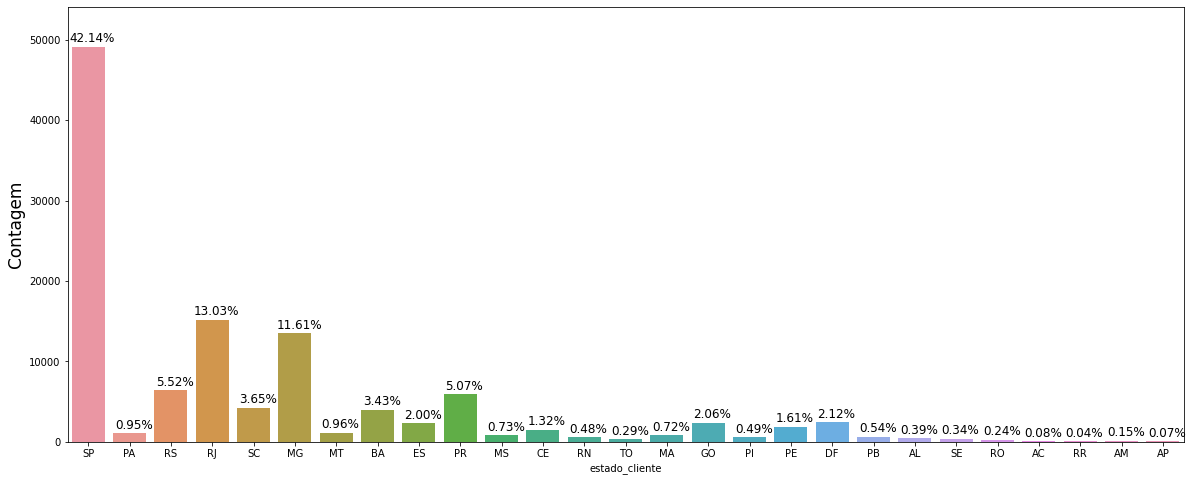

In [ ]:
plot_perc('estado_cliente', df)

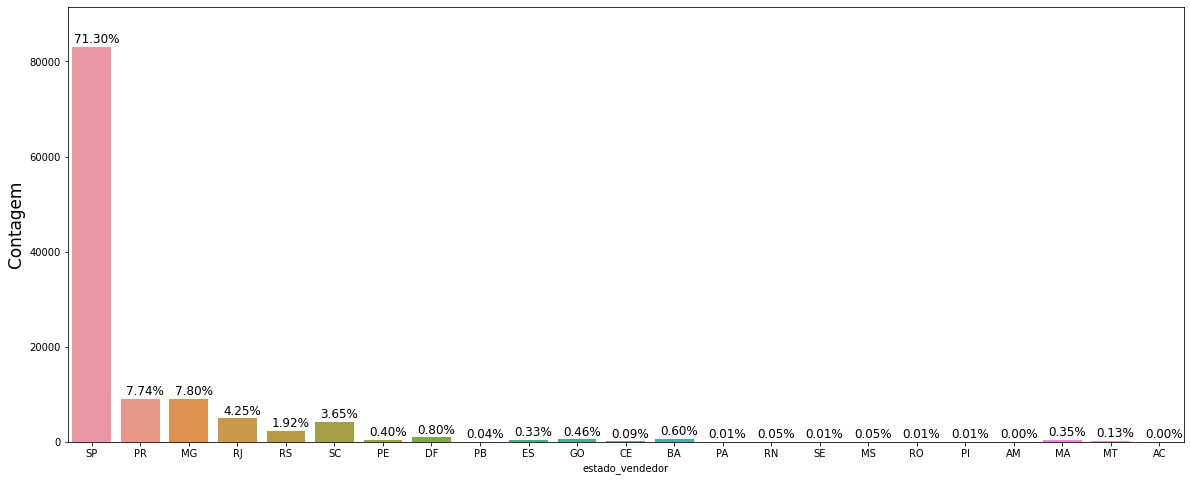

In [ ]:
plot_perc('estado_vendedor', df)

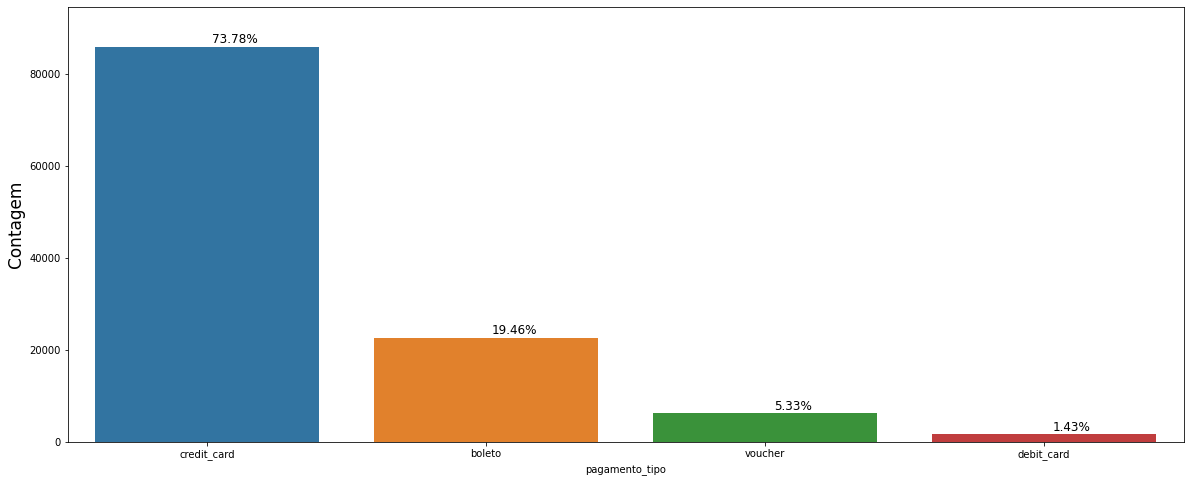

In [ ]:
plot_perc('pagamento_tipo', df)

## RFV

- https://gestaomax.com.br/o-que-e-rfv/

In [ ]:
df_olist = df[['id_unico_cliente', 'id_cliente','horario_pedido', 'item_id', 'preco']]
df_olist

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99
...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90


In [ ]:
df_compra = df.groupby('id_unico_cliente', as_index=False).horario_pedido.max()
df_compra

,id_unico_cliente,horario_pedido
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
94082,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
94083,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
94084,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
94085,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [ ]:
df_compra.rename(columns={'horario_pedido':'DataMaxCompra'},inplace= True)

In [ ]:
df_compra.DataMaxCompra = pd.to_datetime(df_compra.DataMaxCompra)

In [ ]:
df_compra['Recencia'] = (df_compra.DataMaxCompra.max() - df_compra.DataMaxCompra).dt.days

In [ ]:
df_compra.head()

,id_unico_cliente,DataMaxCompra,Recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [ ]:
df_usuario = pd.merge(df_olist,df_compra[['id_unico_cliente', 'Recencia']], on='id_unico_cliente')
df_usuario

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211
...,...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,12
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,41
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,41
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,36


In [ ]:
df_usuario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_unico_cliente  116581 non-null  object 
 1   id_cliente        116581 non-null  object 
 2   horario_pedido    116581 non-null  object 
 3   item_id           116581 non-null  int64  
 4   preco             116581 non-null  float64
 5   Recencia          116581 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 6.2+ MB


In [ ]:
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

In [ ]:
df.loc[df['estado_cliente'].isin(sudeste), 'Regiao'] = 'Southeast'
df.loc[df['estado_cliente'].isin(nordeste), 'Regiao'] = 'Northeast'
df.loc[df['estado_cliente'].isin(norte), 'Regiao'] = 'North'
df.loc[df['estado_cliente'].isin(centro_oeste), 'Regiao'] = 'Midwest'
df.loc[df['estado_cliente'].isin(sul), 'Regiao'] = 'South'

In [ ]:
def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("red", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]],
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [ ]:
cross_heatmap(df[df['preco'] != -1], ['estado_vendedor', 'Regiao'], values=df[df['preco'] != -1]['frete'], aggfunc='mean')

Regiao,Midwest,North,Northeast,South,Southeast
estado_vendedor,,,,,
AC,nan,nan,nan,nan,32.840000
AM,nan,nan,28.255000,nan,25.290000
BA,29.977381,46.290476,22.736355,39.643671,33.618110
CE,65.456667,85.614000,29.744054,51.445556,47.044130
DF,13.022231,58.371935,27.532778,27.076867,19.654101
ES,36.895833,60.022857,38.183269,39.894510,28.753852
GO,14.573721,26.595909,33.369841,30.426667,23.764630
MA,27.150192,28.859000,19.453333,42.660652,31.880362
MG,26.980406,41.923133,34.144730,28.976495,21.278114


## Regra do Cotovelo


- https://www.kaggle.com/code/eriveltonguedes/7-clusteriza-o-k-means-erivelton/notebook

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Cria a Curva de Cotovelo para encontrar o Numero Ideal de Clusters
def calcular_wcss(data):

  wcss = []

  for i in range(1, 10):
      kmeans = KMeans(n_clusters = i);
      kmeans.fit(X = data)
      data['Clusters'] = kmeans.labels_
      wcss.append(kmeans.inertia_)

  return wcss

In [ ]:
df_recencia = df_usuario[['Recencia']]
df_recencia.head()

,Recencia
0,474
1,298
2,298
3,483
4,211


In [ ]:
soma_quadrados = calcular_wcss(df_recencia)
soma_quadrados

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

[2733029504.943269,
 807902990.2831912,
 362034954.49866545,
 213835542.86195773,
 135847580.1614812,
 96358632.6387847,
 69776595.79456726,
 55574528.82556854,
 44125246.50077326]

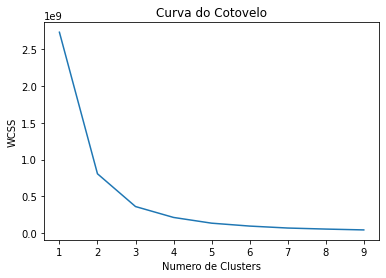

In [ ]:
# Mostra o Gráfico
plt.plot(range(1, 10), soma_quadrados)
plt.title('Curva do Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
def cluster_optmizer(wcss):
  x1, y1 = 2, wcss[0]
  x2, y2 = 20, wcss[len(wcss)-1]
  
  distancia = []

  for i  in range(len(wcss)):
    x0 = i+2
    y0 = wcss[i]

    
    numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominador = np.sqrt((y2-y1)**2 + (x2-x1)**2)
    distancia.append(numerador/denominador)

  return distancia.index(max(distancia)) + 2

In [ ]:
cluster_optmizer(soma_quadrados)

4

## Método da Silhueta


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(df_recencia)
    score = silhouette_score(df_recencia, preds)
    print(score)

0.598482865088416
0.5761366179980644
0.5583001876579513
0.5581809061191414
0.5594172112139227
0.562064294539748
0.5546834503834983
0.561855869469763
0.570241231051847


## Clusterizando a Recencia

In [ ]:
kmeans = KMeans(n_clusters=4)
df_usuario['R_Cluster'] = kmeans.fit_predict(df_recencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,R_Cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,3
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,3
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,0


In [ ]:
group_cluster = df_usuario.groupby('R_Cluster', as_index=False)['Recencia'].mean()
group_cluster

,R_Cluster,Recencia
0,0,187.911204
1,1,490.622269
2,2,66.790878
3,3,320.233294


In [ ]:
group_cluster = group_cluster.sort_values(by='Recencia', ascending=True).reset_index(drop=True)
group_cluster

,R_Cluster,Recencia
0,2,66.790878
1,0,187.911204
2,3,320.233294
3,1,490.622269


In [ ]:
group_cluster['index'] = group_cluster.index
group_cluster

,R_Cluster,Recencia,index
0,2,66.790878,0
1,0,187.911204,1
2,3,320.233294,2
3,1,490.622269,3


In [ ]:
df_usuario

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,R_Cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,3
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,3
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,0
...,...,...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,12,2
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,41,2
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,41,2
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,36,2


In [ ]:
merge_cluster = pd.merge(df_usuario, group_cluster[['R_Cluster','index']], on='R_Cluster')
merge_cluster

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,R_Cluster,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,3
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,3
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,1,3
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,1,3
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,1,3
...,...,...,...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,12,2,0
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,41,2,0
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,41,2,0
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,36,2,0


In [ ]:
df_final = merge_cluster.drop(['R_Cluster'], axis=1).rename(columns={'index':'R_Cluster'})
df_final

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,R_Cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3
...,...,...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,12,0
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,41,0
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,41,0
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,36,0


In [ ]:
def ordenador_cluster(cluster_name, target_name, df, order):
  group_cluster = df.groupby(cluster_name, as_index=False)[target_name].mean()
  group_cluster = group_cluster.sort_values(by=target_name, ascending=order).reset_index(drop=True)
  group_cluster['index'] = group_cluster.index
  merge_cluster = pd.merge(df, group_cluster[[cluster_name,'index']], on=cluster_name)
  df_final = merge_cluster.drop([cluster_name], axis=1).rename(columns={'index':cluster_name})

  return df_final



In [ ]:
df_usuario = ordenador_cluster('R_Cluster', 'Recencia', df_usuario, False)

In [ ]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,R_Cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [ ]:
df_usuario.groupby('R_Cluster')['Recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
R_Cluster,,,,,,,,
0,20324.0,490.622269,59.293154,406.0,444.0,481.0,533.0,728.0
1,30828.0,320.233294,43.971639,255.0,281.0,314.0,357.0,405.0
2,33639.0,187.911204,35.134736,128.0,158.0,187.0,218.0,254.0
3,31790.0,66.790878,36.009443,0.0,33.0,67.0,100.0,127.0


## Clusterizando a Frequência

In [ ]:
df_frequencia = df.groupby('id_unico_cliente', as_index=False)['pedido_aprovado'].count()
df_frequencia.columns = ['id_unico_cliente','Frequencia']
df_frequencia.head()

,id_unico_cliente,Frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [ ]:
df_usuario = pd.merge(df_usuario,df_frequencia,on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,R_Cluster,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1


In [ ]:
df_frequencia = df_usuario[['Frequencia']]
kmeans = KMeans(n_clusters=4)
df_usuario['F_Cluster'] = kmeans.fit_predict(df_frequencia)

In [ ]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,R_Cluster,Frequencia,F_Cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0


In [ ]:
df_usuario = ordenador_cluster('F_Cluster', 'Frequencia', df_usuario, True)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,R_Cluster,Frequencia,F_Cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0


In [ ]:
df_usuario.groupby('F_Cluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
F_Cluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9317.0,5.744875,2.312449,4.0,4.0,5.0,6.0,14.0
2,619.0,22.844911,6.267127,15.0,19.0,22.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


## Clusterizando a Receita

In [ ]:
df_receita = df.groupby('id_unico_cliente', as_index=False)['pagamento_valor'].sum()
df_receita.columns = ['id_unico_cliente','Receita']
df_receita.head()

,id_unico_cliente,Receita
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [ ]:
df_usuario = pd.merge(df_usuario,df_receita,on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,R_Cluster,Frequencia,F_Cluster,Receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33


In [ ]:
df_receita = df_usuario[['Receita']]
kmeans = KMeans(n_clusters=4)
df_usuario['V_Cluster'] = kmeans.fit_predict(df_receita)

In [ ]:
df_usuario = ordenador_cluster('V_Cluster', 'Receita', df_usuario, True)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,R_Cluster,Frequencia,F_Cluster,Receita,V_Cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33,0


In [ ]:
df_usuario.groupby('V_Cluster')['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
V_Cluster,,,,,,,,
0,114904.0,261.485763,377.283592,9.59,69.90,132.82,270.00,3080.96
1,1478.0,5900.843911,2894.129234,3083.40,3798.75,4875.25,7315.92,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


## Criando uma pontuação

In [ ]:
df_final = df_usuario[['id_unico_cliente' ,'Recencia' ,'Frequencia' ,
                       'Receita' ,'R_Cluster' ,'F_Cluster' ,'V_Cluster']]

df_final.head()

,id_unico_cliente,Recencia,Frequencia,Receita,R_Cluster,F_Cluster,V_Cluster
0,861eff4711a542e4b93843c6dd7febb0,474,1,146.87,0,0,0
1,3c799d181c34d51f6d44bbbc563024db,483,1,140.61,0,0,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,1,142.05,0,0,0
3,f40ab89b622248b7ca125af4b486b887,474,1,155.70,0,0,0
4,749943913a9851a39c9baf51877fbab6,533,1,148.33,0,0,0


In [ ]:
df_final['Pontuacao'] = df_usuario['R_Cluster'] + df_usuario['F_Cluster'] + df_usuario['V_Cluster']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_final

,id_unico_cliente,Recencia,Frequencia,Receita,R_Cluster,F_Cluster,V_Cluster,Pontuacao
0,861eff4711a542e4b93843c6dd7febb0,474,1,146.87,0,0,0,0
1,3c799d181c34d51f6d44bbbc563024db,483,1,140.61,0,0,0,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,1,142.05,0,0,0,0
3,f40ab89b622248b7ca125af4b486b887,474,1,155.70,0,0,0,0
4,749943913a9851a39c9baf51877fbab6,533,1,148.33,0,0,0,0
...,...,...,...,...,...,...,...,...
116576,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3,5
116577,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3,5
116578,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3,5
116579,0a0a92112bd4c708ca5fde585afaa872,338,8,109312.64,1,1,3,5


In [ ]:
df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['Pontuacao'] >=1, 'Segmento'] = 'Business'
df_final.loc[df_final['Pontuacao'] >=3, 'Segmento'] = 'Master'
df_final.loc[df_final['Pontuacao'] >=5, 'Segmento'] = 'Premium'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_final.sort_values(by=['Pontuacao'])

,id_unico_cliente,Recencia,Frequencia,Receita,R_Cluster,F_Cluster,V_Cluster,Pontuacao,Segmento
0,861eff4711a542e4b93843c6dd7febb0,474,1,146.87,0,0,0,0,Inativo
12231,48a5985f8d97849159f7675e5f05ed75,588,1,60.10,0,0,0,0,Inativo
12232,d6daa8df6192fb031e54d36f3a7d246a,537,3,66.84,0,0,0,0,Inativo
12233,d6daa8df6192fb031e54d36f3a7d246a,537,3,66.84,0,0,0,0,Inativo
12234,d6daa8df6192fb031e54d36f3a7d246a,537,3,66.84,0,0,0,0,Inativo
...,...,...,...,...,...,...,...,...,...
116552,c8460e4251689ba205045f3ea17884a1,25,24,27935.46,3,2,2,7,Premium
116551,c8460e4251689ba205045f3ea17884a1,25,24,27935.46,3,2,2,7,Premium
116550,c8460e4251689ba205045f3ea17884a1,25,24,27935.46,3,2,2,7,Premium
116564,c8460e4251689ba205045f3ea17884a1,25,24,27935.46,3,2,2,7,Premium


In [ ]:
df_final.to_csv(path+'RFM.csv')

##  Analisando as Features

In [ ]:
def plot_segmento(x,y,data):
    sns.set(palette='muted',color_codes=True,style='whitegrid')
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x,y=y,hue='Segmento',data=data,size='Segmento',sizes=(50,150),size_order=['Premium','Master','Business','Inativo'])
    plt.show()

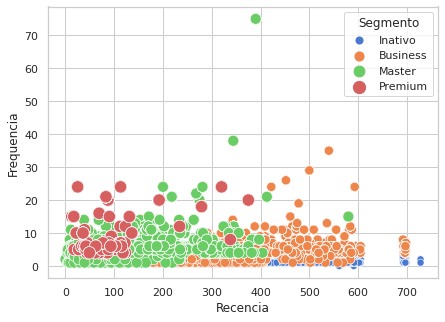

In [ ]:
plot_segmento('Recencia','Frequencia',df_final)

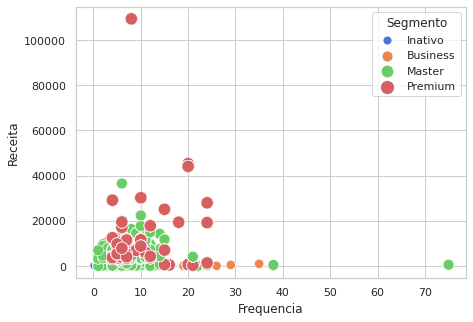

In [ ]:
plot_segmento('Frequencia','Receita',df_final)

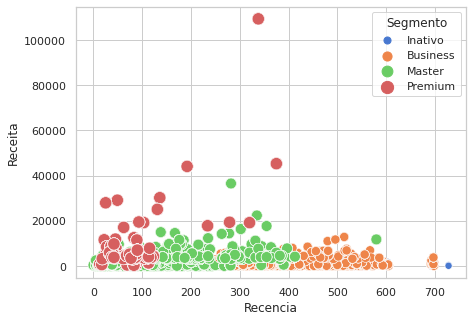

In [ ]:
plot_segmento('Recencia','Receita',df_final)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


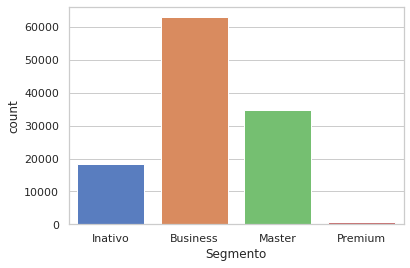

In [ ]:
sns.countplot(df_final['Segmento'])